In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Analysis,auto_arima and EMA for state = AK

In [2]:
x=pd.read_csv('all-states-history.csv',index_col='date',parse_dates=True,usecols=['date','state','positiveIncrease'])

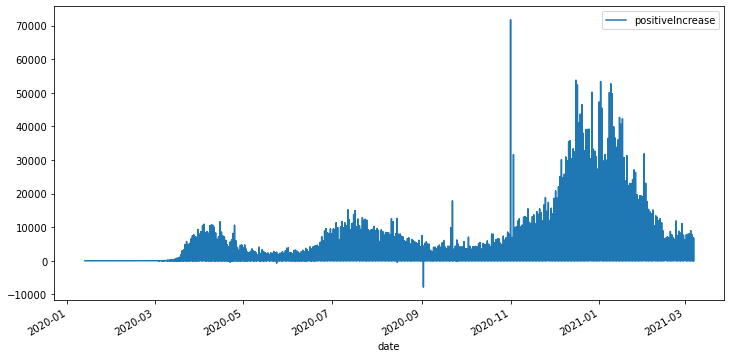

In [3]:
x.plot(figsize=(12,6))

In [4]:
ak=x.query('state == "AK"')
ak=ak.iloc[::-1]
ak

,state,positiveIncrease
date,,
2020-03-06,AK,0
2020-03-07,AK,0
2020-03-08,AK,0
2020-03-09,AK,0
2020-03-10,AK,0
...,...,...
2021-03-03,AK,177
2021-03-04,AK,140
2021-03-05,AK,141


In [5]:
ak['rolling_sum']=ak['positiveIncrease'].cumsum()

In [6]:
ak

,state,positiveIncrease,rolling_sum
date,,,
2020-03-06,AK,0,0
2020-03-07,AK,0,0
2020-03-08,AK,0,0
2020-03-09,AK,0,0
2020-03-10,AK,0,0
...,...,...,...
2021-03-03,AK,177,56605
2021-03-04,AK,140,56745
2021-03-05,AK,141,56886


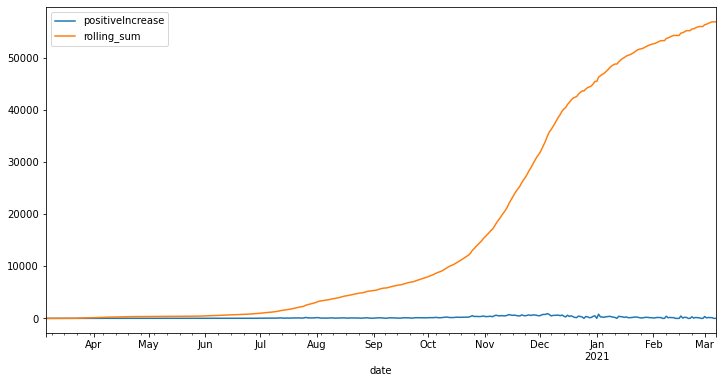

In [7]:
ak.plot(figsize=(12,6))

In [8]:
type(ak)

pandas.core.frame.DataFrame

In [9]:
ak=ak[['rolling_sum']]
ak

,rolling_sum
date,
2020-03-06,0
2020-03-07,0
2020-03-08,0
2020-03-09,0
2020-03-10,0
...,...
2021-03-03,56605
2021-03-04,56745
2021-03-05,56886


In [10]:
ak_train=ak.iloc[:317]
ak_test=ak.iloc[317:]

In [11]:
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

import warnings
warnings.filterwarnings('ignore')

C:\Users\akars\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\akars\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [12]:
fit=auto_arima(ak_train,trace=True,suppress_warnings=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=3620.925, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3752.836, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3683.002, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3625.967, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3629.967, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=3628.467, Time=0.08 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=3629.476, Time=0.12 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3627.926, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=3622.783, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=3628.156, Time=0.11 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3622.726, Time=0.30 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0]          
Total fit time: 2.081 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  317
Model:               SARIMAX(2, 2, 2)   Log Likelihood               -1805.463
Date:                Sat, 05 Feb 2022   AIC                           3620.925
Time:                        01:27:39   BIC                           3639.688
Sample:                             0   HQIC                          3628.422
                                - 317                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8014      0.080     10.060      0.000       0.645       0.958
ar.L2         -0.2195      0.037     -5.871      0.000      -0.293      -0.146
ma.L1         -1.5322      0.083    -18.524      0.000      -1.694      -1.370
ma.L2          0.7052      0.059     11.943      0.000       0.590       0.821
sigma2      5553.3456    199.315     27.862      0.000    5162.694    5943.997
===================================================================================
Ljung-Box (Q):                      129.89   Jarque-Bera (JB):              3513.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             666.23   Skew:                             1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
pred=fit.predict(n_periods =50)

In [14]:
ak_test['Predictions']=pred

In [15]:
ak_test

,rolling_sum,Predictions
date,,
2021-01-17,50296,50229.733854
2021-01-18,50447,50462.460317
2021-01-19,50572,50704.462003
2021-01-20,50732,50949.508053
2021-01-21,50941,51194.957779
2021-01-22,51204,51440.062730
2021-01-23,51445,51684.802775
2021-01-24,51610,51929.326074
2021-01-25,51693,52173.755780


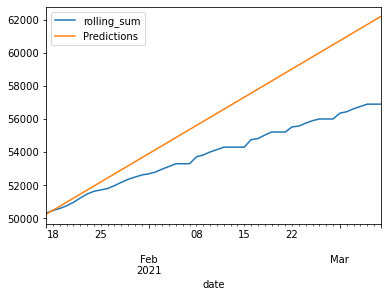

In [16]:
ak_test.plot()

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(ak_test['rolling_sum'],ak_test['Predictions']))
print(rmse)

2819.079047114993


### Moving Average for state = AK

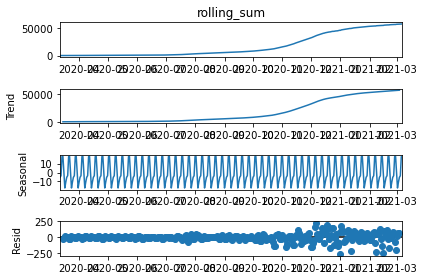

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(ak['rolling_sum'],model = 'add')
result_add.plot();
plt.savefig('Decompose.png')

In [19]:
#1-week SMA for AK
ak['1W_SMA'] = ak['rolling_sum'].rolling(window=7).mean()
ak

,rolling_sum,1W_SMA
date,,
2020-03-06,0,NaN
2020-03-07,0,NaN
2020-03-08,0,NaN
2020-03-09,0,NaN
2020-03-10,0,NaN
...,...,...
2021-03-03,56605,56175.000000
2021-03-04,56745,56297.714286
2021-03-05,56886,56425.857143


In [20]:
ak=ak.dropna()
ak

,rolling_sum,1W_SMA
date,,
2020-03-12,0,0.000000
2020-03-13,0,0.000000
2020-03-14,0,0.000000
2020-03-15,0,0.000000
2020-03-16,0,0.000000
...,...,...
2021-03-03,56605,56175.000000
2021-03-04,56745,56297.714286
2021-03-05,56886,56425.857143


In [21]:
ak_train=ak[:311]
ak_test=ak[311:]

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model1= ExponentialSmoothing(ak_train['1W_SMA'],trend='add').fit()
predictions = model1.forecast(50)
ak_test['Predictions']= predictions

In [23]:
ak_test

,rolling_sum,1W_SMA,Predictions
date,,,
2021-01-17,50296,49497.142857,49493.004058
2021-01-18,50447,49732.857143,49727.720559
2021-01-19,50572,49986.428571,49962.437059
2021-01-20,50732,50204.857143,50197.153560
2021-01-21,50941,50405.714286,50431.870061
2021-01-22,51204,50601.285714,50666.586561
2021-01-23,51445,50805.285714,50901.303062
2021-01-24,51610,50993.000000,51136.019563
2021-01-25,51693,51171.000000,51370.736063


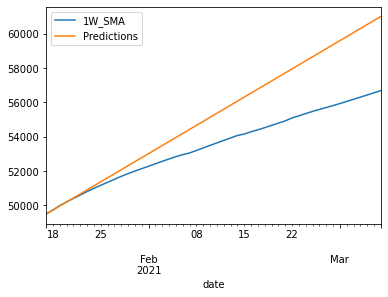

In [24]:
ak_test[['1W_SMA','Predictions']].plot()

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(ak_test['1W_SMA'],ak_test['Predictions']))
print(rmse)

2265.1046442271177


In [87]:
ak=x.query('state == "AK"')
ak=ak.iloc[::-1]
ak['rolling_sum']=ak['positiveIncrease'].cumsum()
ak=ak[['rolling_sum']]
ak

,rolling_sum
date,
2020-03-06,0
2020-03-07,0
2020-03-08,0
2020-03-09,0
2020-03-10,0
...,...
2021-03-03,56605
2021-03-04,56745
2021-03-05,56886


In [90]:
#2-week SMA for AK
ak['2W_SMA'] = ak['rolling_sum'].rolling(window=14).mean()


In [89]:
ak=ak.dropna()
ak

,rolling_sum,2W_SMA
date,,
2020-03-19,11,1.571429
2020-03-20,14,2.571429
2020-03-21,15,3.642857
2020-03-22,25,5.428571
2020-03-23,38,8.142857
...,...,...
2021-03-03,56605,55759.357143
2021-03-04,56745,55883.357143
2021-03-05,56886,56003.928571


In [91]:
ak_train=ak[:304]
ak_test=ak[304:]

In [93]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model1= ExponentialSmoothing(ak_train['2W_SMA'],trend='add').fit()
predictions = model1.forecast(50)
ak_test['Predictions']= predictions

In [94]:
ak_test

,rolling_sum,2W_SMA,Predictions
date,,,
2021-01-17,50296,48596.642857,NaN
2021-01-18,50447,48856.285714,NaN
2021-01-19,50572,49111.000000,NaN
2021-01-20,50732,49353.714286,NaN
2021-01-21,50941,49588.071429,NaN
2021-01-22,51204,49812.428571,NaN
2021-01-23,51445,50031.785714,NaN
2021-01-24,51610,50245.071429,NaN
2021-01-25,51693,50451.928571,NaN


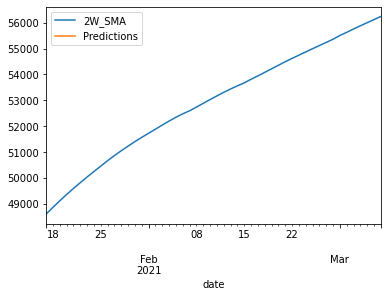

In [96]:
ak_test[['2W_SMA','Predictions']].plot()

In [97]:
ak=x.query('state == "AK"')
ak=ak.iloc[::-1]
ak['rolling_sum']=ak['positiveIncrease'].cumsum()
ak=ak[['rolling_sum']]
ak

,rolling_sum
date,
2020-03-06,0
2020-03-07,0
2020-03-08,0
2020-03-09,0
2020-03-10,0
...,...
2021-03-03,56605
2021-03-04,56745
2021-03-05,56886


In [98]:
#1-month SMA for AK
ak['1M_SMA'] = ak['rolling_sum'].rolling(window=30).mean()
ak

,rolling_sum,1M_SMA
date,,
2020-03-06,0,NaN
2020-03-07,0,NaN
2020-03-08,0,NaN
2020-03-09,0,NaN
2020-03-10,0,NaN
...,...,...
2021-03-03,56605,54720.133333
2021-03-04,56745,54852.466667
2021-03-05,56886,54983.466667


In [99]:
ak=ak.dropna()
ak

,rolling_sum,1M_SMA
date,,
2020-04-04,171,47.000000
2020-04-05,185,53.166667
2020-04-06,191,59.533333
2020-04-07,213,66.633333
2020-04-08,226,74.166667
...,...,...
2021-03-03,56605,54720.133333
2021-03-04,56745,54852.466667
2021-03-05,56886,54983.466667


In [100]:
ak_train=ak[:288]
ak_test=ak[288:]

In [101]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model1= ExponentialSmoothing(ak_train['1M_SMA'],trend='add').fit()
predictions = model1.forecast(50)
ak_test['Predictions']= predictions

In [102]:
ak_test

,rolling_sum,1M_SMA,Predictions
date,,,
2021-01-17,50296,46238.100000,46245.034269
2021-01-18,50447,46511.833333,46531.667892
2021-01-19,50572,46783.800000,46818.301514
2021-01-20,50732,47056.100000,47104.935136
2021-01-21,50941,47320.766667,47391.568759
2021-01-22,51204,47582.200000,47678.202381
2021-01-23,51445,47842.733333,47964.836004
2021-01-24,51610,48108.766667,48251.469626
2021-01-25,51693,48365.533333,48538.103248


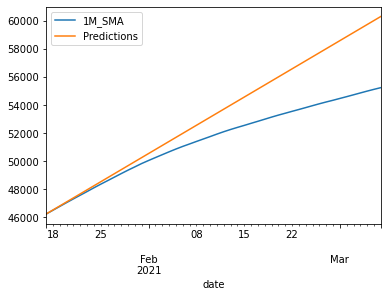

In [103]:
ak_test[['1M_SMA','Predictions']].plot()

In [104]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(ak_test['1M_SMA'],ak_test['Predictions']))
print(rmse)

2433.15699251757


### Analysis,auto_arima and EMA for state = WA

In [42]:
x=pd.read_csv('all-states-history.csv',index_col='date',parse_dates=True,usecols=['date','state','positiveIncrease'])

In [43]:
wa=x.query('state == "WA"')
wa=wa.iloc[::-1]
wa

,state,positiveIncrease
date,,
2020-01-13,WA,0
2020-01-14,WA,0
2020-01-15,WA,0
2020-01-16,WA,0
2020-01-17,WA,0
...,...,...
2021-03-03,WA,733
2021-03-04,WA,795
2021-03-05,WA,854


In [44]:
wa['rolling_sum']=wa['positiveIncrease'].cumsum()
wa

,state,positiveIncrease,rolling_sum
date,,,
2020-01-13,WA,0,0
2020-01-14,WA,0,0
2020-01-15,WA,0,0
2020-01-16,WA,0,0
2020-01-17,WA,0,0
...,...,...,...
2021-03-03,WA,733,341441
2021-03-04,WA,795,342236
2021-03-05,WA,854,343090


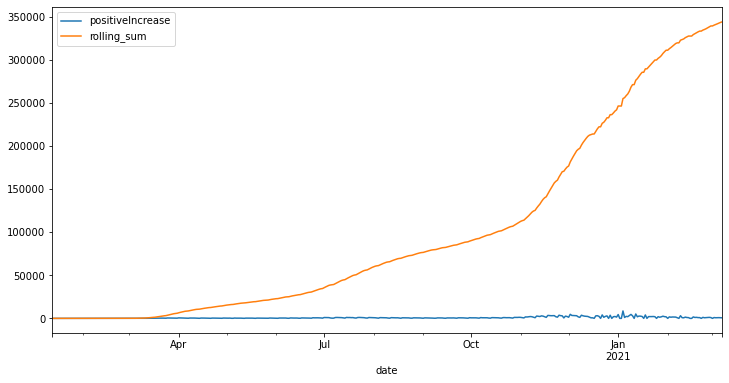

In [45]:
wa.plot(figsize=(12,6))

In [46]:
wa=wa[['rolling_sum']]
wa

,rolling_sum
date,
2020-01-13,0
2020-01-14,0
2020-01-15,0
2020-01-16,0
2020-01-17,0
...,...
2021-03-03,341441
2021-03-04,342236
2021-03-05,343090


In [47]:
wa_train=wa.iloc[:370]
wa_test=wa.iloc[370:]

In [48]:
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

import warnings
warnings.filterwarnings('ignore')

In [49]:
fit=auto_arima(wa_train,trace=True,suppress_warnings=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=5826.668, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6122.006, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=5993.780, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=5852.909, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=5827.607, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=5828.107, Time=0.08 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=5828.082, Time=0.21 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=5817.852, Time=0.20 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=5824.743, Time=0.07 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=5825.946, Time=0.24 sec
 ARIMA(3,2,4)(0,0,0)[0]             : AIC=5803.818, Time=0.55 sec
 ARIMA(4,2,4)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(3,2,5)(0,0,0)[0]             : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  370
Model:               SARIMAX(3, 2, 4)   Log Likelihood               -2893.909
Date:                Mon, 31 Jan 2022   AIC                           5803.818
Time:                        00:56:31   BIC                           5835.083
Sample:                             0   HQIC                          5816.239
                                - 370                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8527      0.081    -10.540      0.000      -1.011      -0.694
ar.L2          0.1175      0.102      1.150      0.250      -0.083       0.318
ar.L3          0.6926      0.073      9.451      0.000       0.549       0.836
ma.L1         -0.1480      0.077     -1.922      0.055      -0.299       0.003
ma.L2         -1.0105      0.067    -15.006      0.000      -1.142      -0.879
ma.L3         -0.3897      0.059     -6.659      0.000      -0.504      -0.275
ma.L4          0.7614      0.056     13.498      0.000       0.651       0.872
sigma2      4.408e+05   1.49e+04     29.500      0.000    4.11e+05     4.7e+05
===================================================================================
Ljung-Box (Q):                      111.76   Jarque-Bera (JB):              5775.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             151.70   Skew:                             1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
pred=fit.predict(n_periods =50)

In [51]:
wa_test['Predictions']=pred

In [52]:
wa_test

,rolling_sum,Predictions
date,,
2021-01-17,285970,289882.380695
2021-01-18,289939,291884.269842
2021-01-19,289939,295369.858134
2021-01-20,291989,298227.462613
2021-01-21,294017,300471.678784
2021-01-22,296087,304192.742455
2021-01-23,298249,306147.489840
2021-01-24,300198,309357.066516
2021-01-25,300198,312311.970683


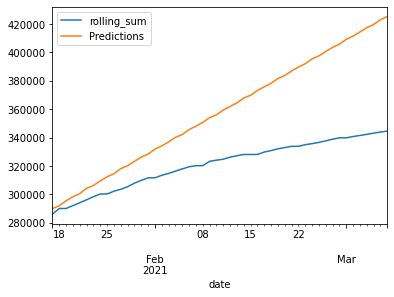

In [53]:
wa_test.plot()

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(wa_test['rolling_sum'],wa_test['Predictions']))
print(rmse)

43803.99076601709


### ### Moving Average for state = WA

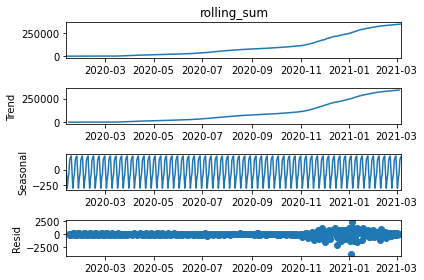

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(wa['rolling_sum'],model = 'add')
result_add.plot();

In [56]:
wa['1W_SMA'] = wa['rolling_sum'].rolling(window=7).mean()
wa

,rolling_sum,1W_SMA
date,,
2020-01-13,0,NaN
2020-01-14,0,NaN
2020-01-15,0,NaN
2020-01-16,0,NaN
2020-01-17,0,NaN
...,...,...
2021-03-03,341441,339247.857143
2021-03-04,342236,340058.000000
2021-03-05,343090,340834.714286


In [57]:
wa=wa.dropna()
wa

,rolling_sum,1W_SMA
date,,
2020-01-19,1,0.142857
2020-01-20,1,0.285714
2020-01-21,2,0.571429
2020-01-22,2,0.857143
2020-01-23,2,1.142857
...,...,...
2021-03-03,341441,339247.857143
2021-03-04,342236,340058.000000
2021-03-05,343090,340834.714286


In [58]:
wa_train=wa[:364]
wa_test=wa[364:]

In [59]:
model1= ExponentialSmoothing(wa_train['1W_SMA'],trend='add').fit()
predictions = model1.forecast(50)
wa_test['Predictions']= predictions

In [60]:
wa_test

,rolling_sum,1W_SMA,Predictions
date,,,
2021-01-17,285970,280534.857143,281069.963922
2021-01-18,289939,283155.428571,283636.154939
2021-01-19,289939,285048.714286,286202.345957
2021-01-20,291989,286969.428571,288768.536974
2021-01-21,294017,288800.142857,291334.727992
2021-01-22,296087,290558.714286,293900.919009
2021-01-23,298249,292312.857143,296467.110027
2021-01-24,300198,294345.428571,299033.301044
2021-01-25,300198,295811.000000,301599.492062


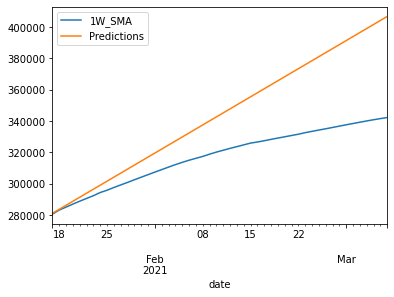

In [61]:
wa_test[['1W_SMA','Predictions']].plot()

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(wa_test['1W_SMA'],wa_test['Predictions']))
print(rmse)

33165.92182599871


In [63]:
wa=x.query('state == "WA"')
wa=wa.iloc[::-1]
wa['rolling_sum']=wa['positiveIncrease'].cumsum()
wa=wa[['rolling_sum']]
wa

,rolling_sum
date,
2020-01-13,0
2020-01-14,0
2020-01-15,0
2020-01-16,0
2020-01-17,0
...,...
2021-03-03,341441
2021-03-04,342236
2021-03-05,343090


In [64]:
wa['2W_SMA'] = wa['rolling_sum'].rolling(window=14).mean()
wa

,rolling_sum,2W_SMA
date,,
2020-01-13,0,NaN
2020-01-14,0,NaN
2020-01-15,0,NaN
2020-01-16,0,NaN
2020-01-17,0,NaN
...,...,...
2021-03-03,341441,336335.428571
2021-03-04,342236,337151.785714
2021-03-05,343090,337943.428571


In [65]:
wa=wa.dropna()
wa

,rolling_sum,2W_SMA
date,,
2020-01-26,2,1.000000
2020-01-27,2,1.142857
2020-01-28,2,1.285714
2020-01-29,2,1.428571
2020-01-30,2,1.571429
...,...,...
2021-03-03,341441,336335.428571
2021-03-04,342236,337151.785714
2021-03-05,343090,337943.428571


In [66]:
wa_train=wa[:357]
wa_test=wa[357:]

In [67]:
model1= ExponentialSmoothing(wa_train['2W_SMA'],trend='add').fit()
predictions = model1.forecast(50)
wa_test['Predictions']= predictions

In [68]:
wa_test

,rolling_sum,2W_SMA,Predictions
date,,,
2021-01-17,285970,271379.142857,271355.746461
2021-01-18,289939,273846.500000,274139.710221
2021-01-19,289939,276239.642857,276923.673982
2021-01-20,291989,278612.642857,279707.637742
2021-01-21,294017,280988.714286,282491.601502
2021-01-22,296087,283279.785714,285275.565263
2021-01-23,298249,285397.071429,288059.529023
2021-01-24,300198,287440.142857,290843.492783
2021-01-25,300198,289483.214286,293627.456543


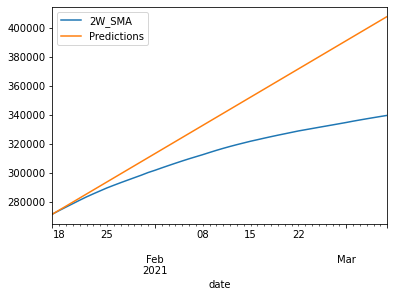

In [69]:
wa_test[['2W_SMA','Predictions']].plot()

In [70]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(wa_test['2W_SMA'],wa_test['Predictions']))
print(rmse)

34418.01156997531


In [71]:
wa=x.query('state == "WA"')
wa=wa.iloc[::-1]
wa['rolling_sum']=wa['positiveIncrease'].cumsum()
wa=wa[['rolling_sum']]
wa

,rolling_sum
date,
2020-01-13,0
2020-01-14,0
2020-01-15,0
2020-01-16,0
2020-01-17,0
...,...
2021-03-03,341441
2021-03-04,342236
2021-03-05,343090


In [72]:
wa['1M_SMA'] = wa['rolling_sum'].rolling(window=30).mean()
wa

,rolling_sum,1M_SMA
date,,
2020-01-13,0,NaN
2020-01-14,0,NaN
2020-01-15,0,NaN
2020-01-16,0,NaN
2020-01-17,0,NaN
...,...,...
2021-03-03,341441,328990.533333
2021-03-04,342236,329953.900000
2021-03-05,343090,330900.500000


In [73]:
wa=wa.dropna()
wa

,rolling_sum,1M_SMA
date,,
2020-02-11,5,2.233333
2020-02-12,5,2.400000
2020-02-13,6,2.600000
2020-02-14,7,2.833333
2020-02-15,7,3.066667
...,...,...
2021-03-03,341441,328990.533333
2021-03-04,342236,329953.900000
2021-03-05,343090,330900.500000


In [74]:
wa_train=wa[:341]
wa_test=wa[341:]

In [75]:
model1= ExponentialSmoothing(wa_train['1M_SMA'],trend='add').fit()
predictions = model1.forecast(50)
wa_test['Predictions']= predictions

In [76]:
wa_test

,rolling_sum,1M_SMA,Predictions
date,,,
2021-01-17,285970,251707.600000,251805.585039
2021-01-18,289939,254029.966667,254195.743852
2021-01-19,289939,256274.600000,256585.902666
2021-01-20,291989,258587.566667,258976.061479
2021-01-21,294017,260833.633333,261366.220293
2021-01-22,296087,263106.966667,263756.379106
2021-01-23,298249,265375.200000,266146.537919
2021-01-24,300198,267612.033333,268536.696733
2021-01-25,300198,269848.866667,270926.855546


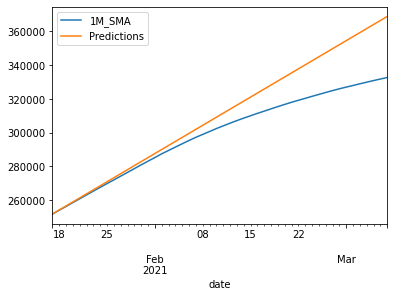

In [77]:
wa_test[['1M_SMA','Predictions']].plot()

In [78]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(wa_test['1M_SMA'],wa_test['Predictions']))
print(rmse)

15916.72249019147
